In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(type(x_train)) # 60000장의 28-28 흙백사진
print(type(y_train)) # 60000개의 정답지
print(type(x_test))  # 10000장의 28-28 흙백사진
print(type(y_test))  # 60000개의 정답지

print(x_train.shape) # 60000장의 28-28 흙백사진
print(y_train.shape) # 60000개의 정답지
print(x_test.shape)  # 10000장의 28-28 흙백사진
print(y_test.shape)  # 60000개의 정답지

print(x_train.dtype) # 60000장의 28-28 흙백사진
print(y_train.dtype) # 60000개의 정답지
print(x_test.dtype)  # 10000장의 28-28 흙백사진
print(y_test.dtype)  # 60000개의 정답지

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
uint8
uint8
uint8
uint8


In [2]:
import tensorflow as tf
import numpy as np
import copy

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = x_train.reshape((-1, 784)), x_test.reshape((-1, 784))
x_train, x_test = x_train.astype(np.float32), x_test.astype(np.float32)

y_train_cls = y_train.astype(np.int32)
y_test_cls = y_test.astype(np.int32) 

y_train = np.eye(10)[y_train].astype(np.float32)
y_test = np.eye(10)[y_test].astype(np.float32)

print(type(x_train)) 
print(type(y_train)) 
print(type(y_train_cls)) 
print(type(x_test))  
print(type(y_test))  
print(type(y_test_cls))  

print(x_train.shape) 
print(y_train.shape) 
print(y_train_cls.shape) 
print(x_test.shape)  
print(y_test.shape)  
print(y_test_cls.shape)

print(x_train.dtype) 
print(y_train.dtype) 
print(y_train_cls.dtype) 
print(x_test.dtype)  
print(y_test.dtype)  
print(y_test_cls.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 784)
(60000, 10)
(60000,)
(10000, 784)
(10000, 10)
(10000,)
float32
float32
int32
float32
float32
int32


In [3]:
lr = 1e-2
epoch = int(3e1)
batch_size = 100

import numpy as np; np.random.seed(0)
import tensorflow as tf; tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 784)) # (?, 784)
y = tf.placeholder(tf.float32, (None, 10)) # (?, 10)
y_cls = tf.placeholder(tf.int32, (None,)) # (?,)

init_w = tf.keras.initializers.VarianceScaling(seed=0)
init_b = tf.keras.initializers.zeros()
w = tf.get_variable('w', (784, 10), tf.float32, init_w)
b = tf.get_variable('b', (10,), tf.float32, init_b)

logits = x @ w + b # (?,10) = (?, 784) @ (784, 10) + (10,) 
entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, 
                                                     logits=logits) # (?,)
loss = tf.reduce_mean(entropy) # ()

opt = tf.train.AdamOptimizer(lr)
train = opt.minimize(loss)

y_pred_cls = tf.cast(tf.argmax(logits, axis=1), 
                     tf.int32, name='y_pred_cls') # (?,) int32
correct_bool = tf.equal(y_pred_cls, y_cls, 
                        name='correct_bool') # (?,) bool
accuracy = tf.reduce_mean(tf.cast(correct_bool, tf.float32), 
                          name='accuracy') # () float32

init = tf.global_variables_initializer()

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
with tf.Session() as sess:
    
    sess.run(init)
    
    loss_trace = []
    accuracy_trace = []

    for i in range(epoch):
        
        idx = np.arange(x_train.shape[0])
        np.random.shuffle(idx)
        
        x_epoch = x_train[idx]
        y_epoch = y_train[idx]
        y_cls_epoch = y_train_cls[idx]
        
        for k in range(x_train.shape[0]//batch_size):
            
            if k==0:
                loss_temp = []
                accuracy_temp = []
                
            x_batch = x_epoch[k*batch_size:(k+1)*batch_size]
            y_batch = y_epoch[k*batch_size:(k+1)*batch_size]
            y_cls_batch = y_cls_epoch[k*batch_size:(k+1)*batch_size]
            
            feed_dict = {x:x_batch, y:y_batch, y_cls:y_cls_batch}
            
            loss_run, accuracy_run, _ = sess.run([loss, accuracy, train], 
                                                 feed_dict=feed_dict)
            
            loss_temp.append(loss_run) 
            accuracy_temp.append(accuracy_run)
        
        loss_avg = np.array(loss_temp).mean()
        accuracy_avg = np.array(accuracy_temp).mean()
        loss_trace.append(loss_avg)
        accuracy_trace.append(accuracy_avg)
        
#         if i%100 == 0:
#             print(f'{i+1}/{epoch} loss {loss_avg}, accuracy {accuracy_avg}')
#         elif i+1 == epoch:
#             print(f'{i+1}/{epoch} loss {loss_avg}, accuracy {accuracy_avg}')
        print(f'{i+1}/{epoch} loss {loss_avg}, accuracy {accuracy_avg} ')
    
    feed_dict = {x:x_test, y:y_test, y_cls:y_test_cls}
    accuracy_run, y_test_cls_pred = sess.run([accuracy, y_pred_cls], 
                                             feed_dict=feed_dict)

1/30 loss 0.3568369448184967, accuracy 0.8984333276748657 
2/30 loss 0.29591622948646545, accuracy 0.9169334173202515 
3/30 loss 0.2866867482662201, accuracy 0.9195333123207092 
4/30 loss 0.2821144759654999, accuracy 0.921383261680603 
5/30 loss 0.27895843982696533, accuracy 0.9226166605949402 
6/30 loss 0.27760156989097595, accuracy 0.9229832887649536 
7/30 loss 0.27395379543304443, accuracy 0.9243666529655457 
8/30 loss 0.27362510561943054, accuracy 0.9243666529655457 
9/30 loss 0.2716757357120514, accuracy 0.9245166182518005 
10/30 loss 0.2714900076389313, accuracy 0.9247499704360962 
11/30 loss 0.2712428867816925, accuracy 0.9250999689102173 
12/30 loss 0.2716073989868164, accuracy 0.9250167012214661 
13/30 loss 0.26563355326652527, accuracy 0.9261665940284729 
14/30 loss 0.27085816860198975, accuracy 0.9251165986061096 
15/30 loss 0.2673291862010956, accuracy 0.9249499440193176 
16/30 loss 0.2659061551094055, accuracy 0.9271332621574402 
17/30 loss 0.26546016335487366, accuracy 0.

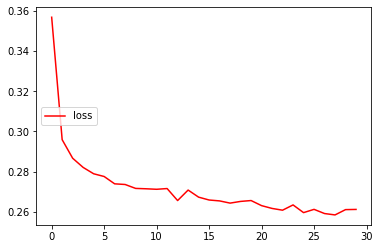

In [5]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax1.plot(loss_trace, color='red', label='loss')
plt.legend(loc='center left')

# ax2 = ax1.twinx() 
# ax2.plot(accuracy_trace, color='blue', label='accuracy')
# plt.legend(loc='center right')

plt.show()

In [6]:
print(f'Test Period Accuracy : {accuracy_run}')

Test Period Accuracy : 0.9146999716758728


In [7]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_true=y_test_cls, y_pred=y_test_cls_pred)
print(cm)

[[ 952    0    3    2    3    8    7    2    2    1]
 [   0 1119    4    2    0    1    3    1    5    0]
 [   9   16  896   22   10    3   10   10   52    4]
 [   4    1   14  929    4   19    2    9   23    5]
 [   1    3    7    6  930    0    4    4    6   21]
 [   6    3    3   39   10  744   13    4   64    6]
 [   7    3    7    2   12   32  888    1    6    0]
 [   1   13   17   14    7    2    0  932    4   38]
 [   6   15    3   26   13   23    5    9  859   15]
 [   7    8    2    8   46    9    0   20   11  898]]


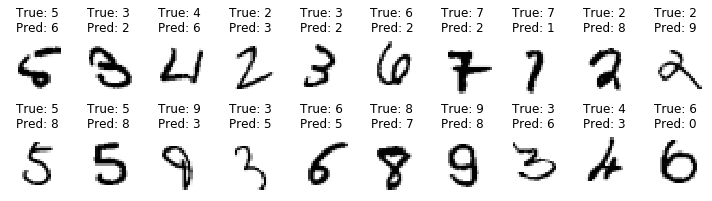

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 10, figsize=(10,3))

idx = 0
for ax in axes.reshape((-1,)):
    while True:
        if y_test_cls[idx]==y_test_cls_pred[idx]:
            idx += 1
        else:
            ax.imshow(x_test[idx].reshape((28,28)), cmap=plt.cm.binary)
            true_label = y_test_cls[idx]
            pred_label = y_test_cls_pred[idx]
            title = f'True: {true_label}\nPred: {pred_label}'
            ax.set_title(title)
            ax.axis('off')
            idx += 1
            break
            
plt.tight_layout()

plt.show()